## Hypothesis Testing Assignment

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [3]:
df = pd.read_csv('nba_games_2013_2015.csv', sep = ';')
df2015 = df[df.SEASON_ID == 22015]
df2014 = df[df.SEASON_ID == 22014]
df2013 = df[df.SEASON_ID == 22013]

In [48]:
df2014

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
2460,22014,1610612760,OKC,Oklahoma City Thunder,21401222,2015-04-15,OKC @ MIN,W,241,138,...,0.710,18,28,46,22,10,6,13,25,25.0
2461,22014,1610612765,DET,Detroit Pistons,21401226,2015-04-15,DET @ NYK,W,240,112,...,0.741,11,33,44,20,14,3,12,22,22.0
2462,22014,1610612766,CHA,Charlotte Hornets,21401228,2015-04-15,CHA @ TOR,L,240,87,...,0.938,8,28,36,15,8,3,12,10,-5.0
2463,22014,1610612737,ATL,Atlanta Hawks,21401217,2015-04-15,ATL @ CHI,L,240,85,...,0.714,10,32,42,15,10,10,15,19,-6.0
2464,22014,1610612759,SAS,San Antonio Spurs,21401223,2015-04-15,SAS @ NOP,L,238,103,...,0.769,4,32,36,33,2,3,15,20,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,W,240,101,...,0.484,26,36,62,20,10,17,9,17,17.0
4916,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,L,239,100,...,0.842,9,24,33,17,9,3,10,20,-1.0
4917,22014,1610612753,ORL,Orlando Magic,21400001,2014-10-28,ORL @ NOP,L,239,84,...,0.762,16,40,56,17,5,9,18,25,-17.0
4918,22014,1610612745,HOU,Houston Rockets,21400003,2014-10-28,HOU @ LAL,W,241,108,...,0.680,14,33,47,22,7,3,13,30,18.0


---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [4]:
PTS_Cavs = pd.Series(df2015['PTS'][df2015.TEAM_NAME == 'Cleveland Cavaliers'])
PTS_GSW = pd.Series(df2015['PTS'][df2015.TEAM_NAME == 'Golden State Warriors'])
FG_PCT_Cavs = pd.Series(df2015['FG_PCT'][df2015.TEAM_NAME == 'Cleveland Cavaliers'])
FG_PCT_GSW = pd.Series(df2015['FG_PCT'][df2015.TEAM_NAME == 'Golden State Warriors'])

In [14]:
def two_sided_t_test(data1, data2,nullhyp="Not specified",to_print=False,alpha=0.05):

    """Check whether or not we reject give a null hypothesis
    |Parameters|
        data1, data2: Panda series of the 2 asmples to compare
        nullhyp: (string) Null hypothesis
        to_print: (boolean) Whether to print or not, default is False
        alpha: (float, optional) P-value threshold for signifigance.  Default is 0.05
    """

    ttest = ttest_ind(data1, data2)
    if to_print:
        print('Null hypothesis tested: ', nullhyp)
        if ttest[1] < alpha:
            print('Test result: The null hypothesis is rejected, samples are significantly different \n')
        else:
            print('Test result: Fail to reject the null hypothesis \n')
    return ttest[1]
        
two_sided_t_test(PTS_Cavs, PTS_GSW, "Testing that the 2015/2016 CLE & GSW Points were from the same distribution", True)
two_sided_t_test(FG_PCT_Cavs, FG_PCT_GSW, "Testing that the Field Goal % was from the same distribution", True)


Null hypothesis tested:  Testing that the 2015/2016 CLE & GSW Points were from the same distribution
Test result: The null hypothesis is rejected, samples are significantly different 

Null hypothesis tested:  Testing that the Field Goal % was from the same distribution
Test result: The null hypothesis is rejected, samples are significantly different 



0.00206097581047554

-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [125]:
df = df[df.SEASON_ID != 22013]
dfBlatt = df[df.TEAM_NAME == 'Cleveland Cavaliers']
df_after_Blatt = pd.Series(dfBlatt['PTS'][dfBlatt.GAME_DATE > '2016-01-24'])
df_during_Blatt = pd.Series(dfBlatt['PTS'][dfBlatt.GAME_DATE <= '2016-01-24'])

alpha = 0.05

Blatt_score = ttest_ind(df_after_Blatt, df_during_Blatt)

if Blatt_score[1] < alpha:
    print('reject')
else:
    print('do not reject')


reject


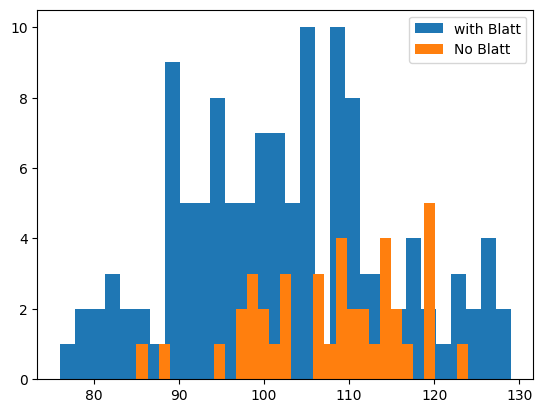

In [130]:
plt.hist(df_during_Blatt, bins=30)
plt.hist(df_after_Blatt, bins=30)
plt.legend(('with Blatt', 'No Blatt'))
plt.show()

In [133]:
nsamples = 40
ntests = 100 
alpha = 0.05

meanP = []

for test in range(ntests):
    randsampleBlatt = np.random.permutation(df_during_Blatt)[0:nsamples]
    randsamplepostBlatt = np.random.permutation(df_after_Blatt)[:nsamples]
    tstat,pvalue = st.ttest_ind(randsampleBlatt,randsamplepostBlatt)
    meanP.append(pvalue)

print('Average p value: ', sum(meanP)/ntests)
print('Number of t-tests performed: ', len(meanP))

if sum(meanP)/ntests > alpha:
    print('Conclusion: Coach Blatt does not make a difference')
else:
    print('Conclusion: Coach Blatt makes the difference')


Average p value:  0.0672521522127618
Number of t-tests performed:  100
Conclusion: Coach Blatt does not make a difference


----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.

In [139]:
df_playoffs = pd.read_csv('nba_playoff_games_2016.csv', sep = ';')

In [140]:
from statistics import mean

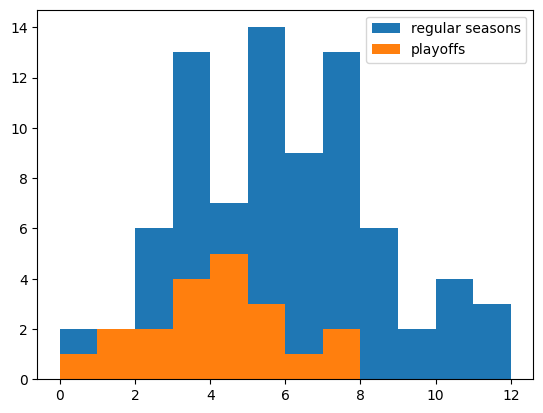

In [141]:
raptors_regular_season = df2015[df2015['TEAM_NAME'] == 'Toronto Raptors']['BLK']
raptors_playoffs = df_playoffs[df_playoffs['TEAM_NAME'] == 'Toronto Raptors']['BLK']

plot_bins = range(max(raptors_regular_season) - min(raptors_regular_season))

plt.hist(raptors_regular_season, bins=plot_bins)
plt.hist(raptors_playoffs, bins=plot_bins)
plt.legend(('regular seasons', 'playoffs'))
plt.show()

In [151]:
def indttest_randsamp(data1, data2, nullhyp='Not Specified', ntests=1000, nsamples=False, alpha=0.05):

    if nsamples == False:
        nsamples=min([len(data1),len(data2)])
    allPValues = []

    for test in range(ntests):
        randsample1 = np.random.permutation(data1)[:nsamples]
        randsample2 = np.random.permutation(data2)[:nsamples]
        pvalue = indttest(randsample1,randsample2,nullhyp,False,alpha)
        allPValues.append(pvalue)

    print('Power (alpha): ',alpha)
    print("Average p value: ",sum(allPValues)/len(allPValues))
    print('Sample size: ', nsamples)
    print('Number of t-tests performed: ',len(allPValues)) # Check that number of p values equals number of t-tests
    print('Null hypothesis tested: ',nullhyp)
    
    if sum(meanP)/ntests < alpha:
        print('Conclusion: Reject the null hypothesis, samples are significantly different')
    else:
        print('Conclusion: Fail to reject the null hypothesis')
    return sum(allPValues)/len(allPValues)

In [152]:
indttest_randsamp(raptors_regular_season, raptors_playoffs,"No difference in BLK between regular season vs. playoff seasons.", 5000)

Power (alpha):  0.05
Average p value:  0.04471203357721172
Sample size:  20
Number of t-tests performed:  5000
Null hypothesis tested:  No difference in BLK between regular season vs. playoff seasons.
Conclusion: Reject the null hypothesis, samples are significantly different


0.04471203357721172


-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [154]:
df = pd.read_csv('nba_games_2013_2015.csv', sep = ';')
dataClev = df[df['TEAM_NAME'] == 'Cleveland Cavaliers']

clev13 = dataClev[dataClev['SEASON_ID'] == 22013]['PTS']
clev14 = dataClev[dataClev['SEASON_ID'] == 22014]['PTS']
clev15 = dataClev[dataClev['SEASON_ID'] == 22015]['PTS']

In [155]:
def levene_test(*samples, center = 'mean', alpha = 0.05):
    if center == False:
        center = 'mean'

    leveneStat, leveneP = st.levene(*samples, center = center, proportiontocut=0)

    print('Based on levene test with centre set to ', center, '...')
    print('Statistic: ', leveneStat)
    print('P value: ,', leveneP)
    
    if leveneP > alpha:
        print('Homogeneity of variance (homoscedasticity) is met.')
    else:
        print('Homogeneity of variance (homoscedasticity) is violated.')
    print('\n')
    return leveneStat, leveneP

levene_test(clev13, clev14, clev15)
levene_test(clev13, clev14, clev15, center = 'median')

Based on levene test with centre set to  mean ...
Statistic:  0.7598047344796496
P value: , 0.46886572166835905
Homogeneity of variance (homoscedasticity) is met.


Based on levene test with centre set to  median ...
Statistic:  0.7268088885666648
P value: , 0.48449719064746033
Homogeneity of variance (homoscedasticity) is met.




(0.7268088885666648, 0.48449719064746033)

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.

In [156]:
# Checked resources for how to perform one-way ANOVA:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html?highlight=anova
# https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

Fstat, pvalueClevPts = st.f_oneway(clev13, clev14,clev15)
print(pvalueClevPts)

# Custom function that evaluates whehter or not to reject null hypothesis
def evaluate_test(p,alpha = 0.05):
    """
    PARAMS:
    - p (float) - p-value from any test
    - alpha (optional,float) - significance level
    """
    if p < alpha:
        print("We reject the hypothesis H0; significant differences found!")
    else:
        print("We fail to reject the hypothesis H0; no significant differences found.")
    return

evaluate_test(pvalueClevPts)

0.003087727119983984
We reject the hypothesis H0; significant differences found!
